<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Dheeraj_MODULE_01_LAB_01_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracting features from data**

 Module1, Lab1

In [3]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=84a41c9ce29989e85da32d77c5e0fbec1851c4a2dd6c79b4baafceffd6c84e02
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


Part 1 : Features of text

How do we apply machine learning on text? We can't directly use the text as input to our algorithms.We need TO convert them to features in the notebook,we will explore a simple way of converting text to features.

Tokenization breaks text in to individual words or tokens
N-grams consider sequences of words,like bigrams or trigram
1. stemming: running->run
2. Lowercase: Running->running
3.Tokenization:"unbreakable" ->["un","break","able"]









In [4]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en')
eng_giraffe = wikipedia.page(topic1).content
eng_elephant = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr_giraffe = wikipedia.page(topic1).content
fr_elephant = wikipedia.page(topic2).content
print("Content retrieved for", topic1, "and", topic2, "in English and French.")

Content retrieved for Giraffe and Elephant in English and French.


We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.


In [5]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub(r'[^a-z0-9\s]', '', text) # allow letters, numbers, and spaces
  return text

In [6]:
print(eng_giraffe[:100])

The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest livin


Now let us calculate the frequency of the character n-grams.N-grams are groups of characters of size n.An unigram is a single character and a bigram is a group of two characters ans so on.
Let us us count the frequency of each character in a text and plot it in a histogram.

In [7]:
def plothistogram_improved(ngram, title="Histogram"):
  """
  Plots a histogram from n-gram data using Plotly for interactivity.

  Args:
      ngram (dict): A dictionary where keys are n-grams (tuples or strings)
                    and values are their frequencies.
      title (str, optional): The title of the histogram. Defaults to "Histogram".
  """
  keys = [str(key) for key in ngram.keys()] # Convert keys to strings
  values = list(ngram.values())

  # Sort by keys for consistent plotting
  combined = sorted(zip(keys, values))
  keys, values = zip(*combined)

  fig = px.bar(x=keys, y=values, title=title)
  fig.update_layout(xaxis_title="N-gram", yaxis_title="Frequency")
  fig.show()

Let us compare the histograms of English pages and French pages.Can you spot a difference?

In [8]:


eng_giraffe_clean = cleanup(eng_giraffe)
fr_giraffe_clean = cleanup(fr_giraffe)

eng_char_counts = Counter(eng_giraffe_clean)
fr_char_counts = Counter(fr_giraffe_clean)

plothistogram_improved(eng_char_counts, title="Character Frequency - English Giraffe")
plothistogram_improved(fr_char_counts, title="Character Frequency - French Giraffe")

In [9]:
fr_elephant_clean = cleanup(fr_elephant)
fr_char_counts_elephant = Counter(fr_elephant_clean)

plothistogram_improved(fr_char_counts, title="Unigram Frequency - French 1")
plothistogram_improved(fr_char_counts_elephant, title="Unigram Frequency - French 2")

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

In [10]:
# Function to get n-grams
def get_ngram_counts(text, n=2):
  """
  Calculates the frequency of character n-grams in a text.

  Args:
      text (str): The input text.
      n (int, optional): The size of the n-grams. Defaults to 2 for bigrams.

  Returns:
      Counter: A Counter object with n-gram frequencies.
  """
  n_grams = ngrams(text, n)
  return Counter(n_grams)

# Generate bigrams for English and French texts with different parameters
eng_giraffe_clean = cleanup(eng_giraffe) # Ensure this is present and executed
eng_elephant_clean = cleanup(eng_elephant) # Add this line to clean the English elephant text
fr_giraffe_clean = cleanup(fr_giraffe)   # Ensure this is present and executed
fr_elephant_clean = cleanup(fr_elephant) # Ensure this is present and executed


eng1_bigrams = get_ngram_counts(eng_giraffe_clean, n=2)
eng2_bigrams = get_ngram_counts(eng_elephant_clean, n=2)
fr1_bigrams = get_ngram_counts(fr_giraffe_clean, n=2)
fr2_bigrams = get_ngram_counts(fr_elephant_clean, n=2)

# Print a few bigrams from each set
print("English Giraffe Bigrams (first 10):", eng1_bigrams.most_common(10))
print("English Elephant Bigrams (first 10):", eng2_bigrams.most_common(10))
print("French Giraffe Bigrams (first 10):", fr1_bigrams.most_common(10))
print("French Elephant Bigrams (first 10):", fr2_bigrams.most_common(10))

English Giraffe Bigrams (first 10): [(('e', ' '), 1194), (('s', ' '), 1122), ((' ', 't'), 882), ((' ', 'a'), 829), (('t', 'h'), 827), (('h', 'e'), 697), (('d', ' '), 639), (('i', 'n'), 604), (('e', 's'), 585), (('n', ' '), 580)]
English Elephant Bigrams (first 10): [(('s', ' '), 1620), (('e', ' '), 1563), ((' ', 't'), 1358), ((' ', 'a'), 1275), (('t', 'h'), 1234), (('a', 'n'), 1130), (('h', 'e'), 981), (('i', 'n'), 884), (('n', ' '), 872), (('d', ' '), 868)]
French Giraffe Bigrams (first 10): [(('e', ' '), 1286), (('s', ' '), 898), (('e', 's'), 686), ((' ', 'd'), 595), (('t', ' '), 573), ((' ', 'l'), 519), (('l', 'e'), 465), (('d', 'e'), 411), (('e', 'n'), 387), (('o', 'n'), 370)]
French Elephant Bigrams (first 10): [(('e', ' '), 1686), (('s', ' '), 1426), ((' ', 'd'), 1008), (('e', 's'), 962), (('t', ' '), 941), ((' ', 'l'), 860), (('n', 't'), 802), (('d', 'e'), 672), (('e', 'n'), 640), (('l', 'e'), 621)]


In [11]:
# Plotting bigram histograms for comparison
plothistogram_improved(eng1_bigrams, title="Bigram Frequency - English Giraffe")
plothistogram_improved(fr1_bigrams, title="Bigram Frequency - French Giraffe")

Another way to visualize bigram is to use a 2-dimensional graph

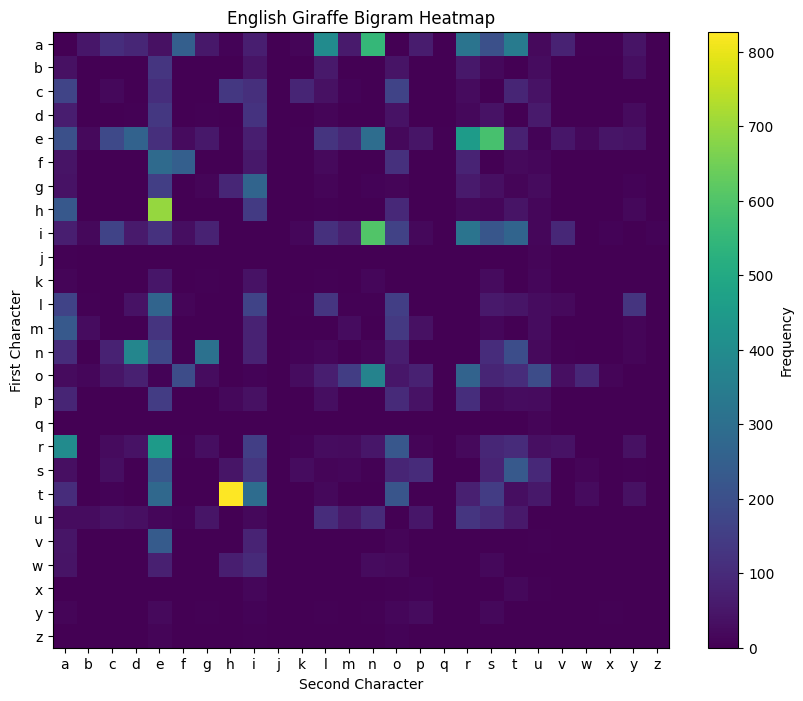

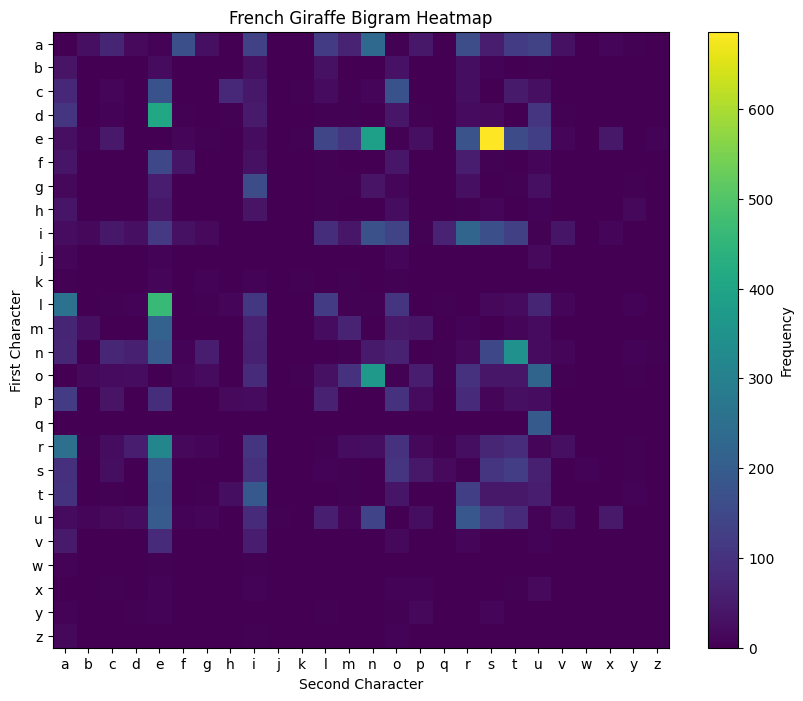

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def plotbihistogram_heatmap(ngram, title="Bigram Heatmap"):
  freq = np.zeros((26, 26))
  for (char1, char2), count in ngram.items():
    if 'a' <= char1 <= 'z' and 'a' <= char2 <= 'z':
      row = ord(char1) - ord('a')
      col = ord(char2) - ord('a')
      freq[row, col] = count

  plt.figure(figsize=(10, 8))
  plt.imshow(freq, cmap='viridis')
  plt.colorbar(label='Frequency')
  plt.title(title)
  plt.xlabel("Second Character")
  plt.ylabel("First Character")
  plt.xticks(np.arange(26), [chr(ord('a') + i) for i in range(26)])
  plt.yticks(np.arange(26), [chr(ord('a') + i) for i in range(26)])
  plt.show()

plotbihistogram_heatmap(eng1_bigrams, title="English Giraffe Bigram Heatmap")
plotbihistogram_heatmap(fr1_bigrams, title="French Giraffe Bigram Heatmap")

Let us look at the top 10 ngrams for each text

In [13]:
from IPython.core.debugger import set_trace
import numpy as np
def ind2tup (ind, base=26):
  ind =int(ind)
  i=int(ind/base)
  j=int(ind%base)
  return(chr(ord('a')+i),chr(ord('a')+j))

def ShowTopN(briefreq, n=10,reverse=True):
  # Correct the variable name here from bifreq to briefreq as defined in the function arguments
  f=briefreq.flatten()
  arg=np.argsort(-f if reverse else f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

#Example usage:
bifreq =np.random.rand(26,26)
ShowTopN(bifreq,n=5)

('a', 'y') : 0.9999422100305831
('j', 'd') : 0.9981404377348566
('q', 'r') : 0.9978598932837995
('f', 'w') : 0.9973063097567297
('x', 'l') : 0.9968225003297452


In [14]:
def ShowTopN_by_language_and_topic(language, topic, n=10, reverse=True):
  """
  Prints the top N bigrams for a given language and topic.

  Args:
      language (str): The language ('English' or 'French').
      topic (str): The topic ('Giraffe' or 'Elephant').
      n (int, optional): The number of top bigrams to show. Defaults to 10.
      reverse (bool, optional): Whether to sort in descending order (True)
                                  or ascending order (False). Defaults to True.
  """
  if language == 'English':
    if topic == 'Giraffe':
      bigrams = eng1_bigrams
    elif topic == 'Elephant':
      bigrams = eng2_bigrams
    else:
      print(f"Invalid topic: {topic}")
      return
  elif language == 'French':
    if topic == 'Giraffe':
      bigrams = fr1_bigrams
    elif topic == 'Elephant':
      bigrams = fr2_bigrams
    else:
      print(f"Invalid topic: {topic}")
      return
  else:
    print(f"Invalid language: {language}")
    return

  print(f'\n{language} {topic}:')
  # Convert Counter to a list of tuples (key, value)
  bigram_list = list(bigrams.items())

  # Sort the list based on frequency
  sorted_bigrams = sorted(bigram_list, key=lambda item: item[1], reverse=reverse)

  for i in range(min(n, len(sorted_bigrams))):
    bigram, frequency = sorted_bigrams[i]
    print(f'{bigram} : {frequency}')

# Example usage:
ShowTopN_by_language_and_topic('English', 'Giraffe', n=10)
ShowTopN_by_language_and_topic('English', 'Elephant', n=10)
ShowTopN_by_language_and_topic('French', 'Giraffe', n=10)
ShowTopN_by_language_and_topic('French', 'Elephant', n=10)



English Giraffe:
('e', ' ') : 1194
('s', ' ') : 1122
(' ', 't') : 882
(' ', 'a') : 829
('t', 'h') : 827
('h', 'e') : 697
('d', ' ') : 639
('i', 'n') : 604
('e', 's') : 585
('n', ' ') : 580

English Elephant:
('s', ' ') : 1620
('e', ' ') : 1563
(' ', 't') : 1358
(' ', 'a') : 1275
('t', 'h') : 1234
('a', 'n') : 1130
('h', 'e') : 981
('i', 'n') : 884
('n', ' ') : 872
('d', ' ') : 868

French Giraffe:
('e', ' ') : 1286
('s', ' ') : 898
('e', 's') : 686
(' ', 'd') : 595
('t', ' ') : 573
(' ', 'l') : 519
('l', 'e') : 465
('d', 'e') : 411
('e', 'n') : 387
('o', 'n') : 370

French Elephant:
('e', ' ') : 1686
('s', ' ') : 1426
(' ', 'd') : 1008
('e', 's') : 962
('t', ' ') : 941
(' ', 'l') : 860
('n', 't') : 802
('d', 'e') : 672
('e', 'n') : 640
('l', 'e') : 621


In [15]:
def ShowTopN(briefreq, n=10, reverse=True):
    pass

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).

A few ways to explore:

Try with different languages.
The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
How can we use and visualize trigrams and higher n-grams?

Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [16]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



Extract a subset of the data for our experiment:

In [17]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here

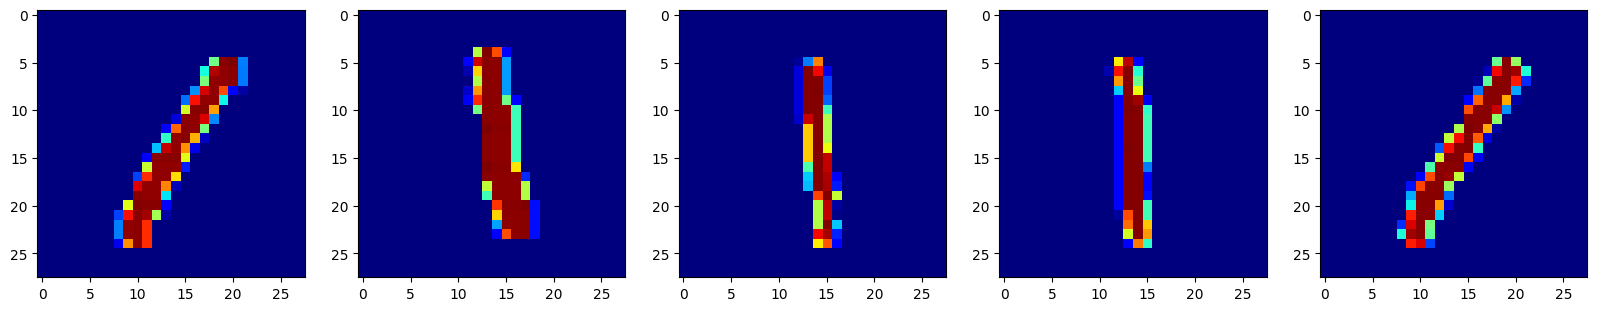

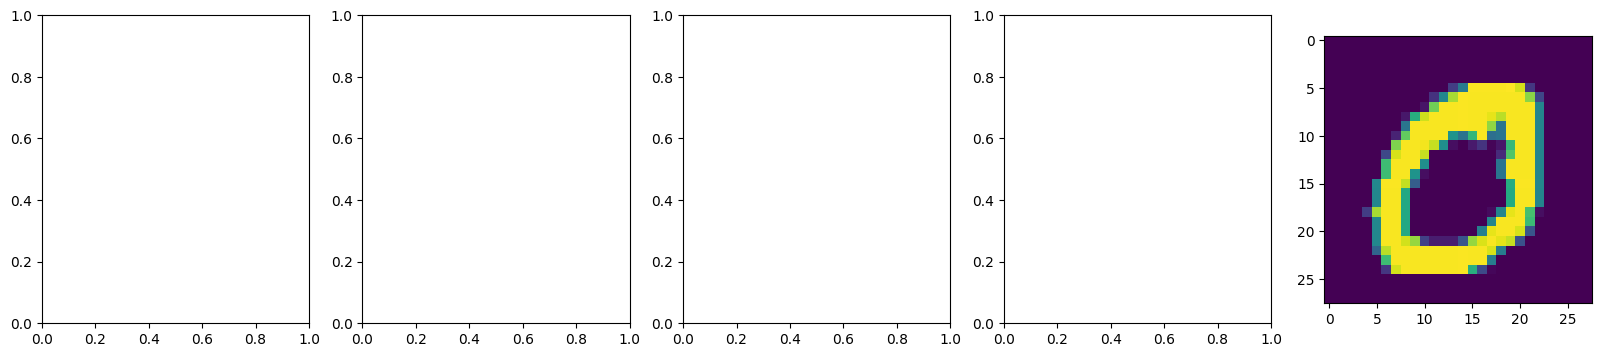

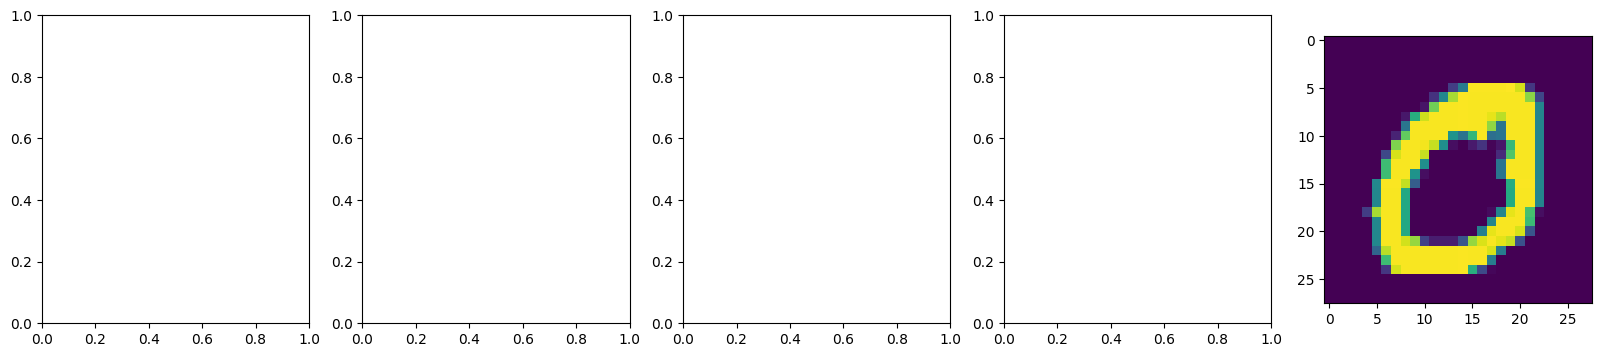

In [18]:
fig, axs=plt.subplots(1,5, figsize=(20,4))
for ii in range(5):
  axs[ii].imshow(no1[ii,:,:], cmap='jet')
plt.show()

fig, axs = plt.subplots(1,5,figsize=(20,4))
for i in range(5):
  axs[ii].imshow(no0[ii,:,:],cmap='viridis')
plt.show()
fig, axs = plt.subplots(1,5,figsize=(20,4))
for i in range(5):
  axs[ii].imshow(no0[ii,:,:],cmap='viridis')
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [19]:
import matplotlib.pyplot as plt
sum1=np.sum(no1 > 0.5,(1,2))
sum0=np.sum(no0 > 0.5,(1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

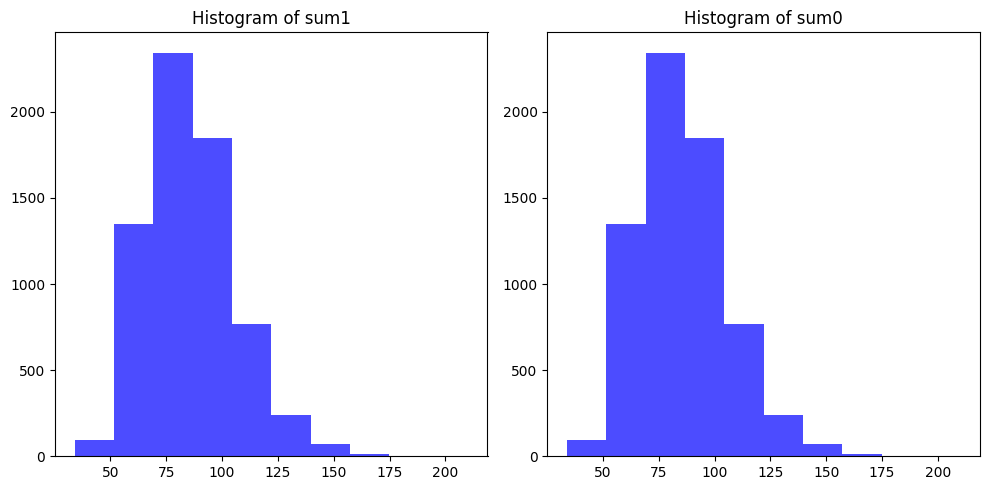

Mean sum for no1: 85.84603975081578
Mean sum for no1: 191.97484382914064


In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(sum1,bins=10,alpha=0.7,color='b')
plt.title('Histogram of sum1')

plt.subplot(1,2,2)
plt.hist(sum1,bins=10,alpha=0.7,color='b')
plt.title('Histogram of sum0')

plt.tight_layout()
plt.show()

print("Mean sum for no1:",np.mean(sum1))
print("Mean sum for no1:",np.mean(sum0))

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels"

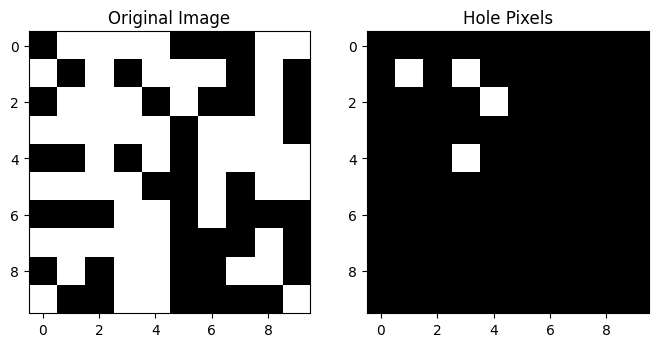

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the getHolePixels function BEFORE it's called
def getHolePixels(img):
    """
    Calculates the number of "hole" pixels in a binary image.

    A hole pixel is a black pixel (value <= 0.5) surrounded by white pixels (value > 0.5).

    Args:
        img (np.ndarray): A 2D numpy array representing the image.

    Returns:
        np.ndarray: A 2D numpy array where 1 indicates a hole pixel and 0 otherwise.
    """
    img = img.copy() > 0.5 # Convert to boolean: True for white, False for black
    # Pad the image to handle boundary cases
    padded_img = np.pad(img, 1, mode='constant', constant_values=False)
    # Check if a pixel and its neighbors are True
    # For a pixel (i, j) in the original image, check the padded image at (i+1, j+1)
    # and its neighbors at (i, j+1), (i+2, j+1), (i+1, j), (i+1, j+2)
    is_neighbor_white = (
        padded_img[:-2, 1:-1] &  # Up
        padded_img[2:, 1:-1] &   # Down
        padded_img[1:-1, :-2] & # Left
        padded_img[1:-1, 2:]    # Right
    )
    # A hole pixel is originally black AND has all four neighbors white
    hole_pixels = (~img) & is_neighbor_white
    return hole_pixels

img_example = np.random.randint(0, 2, size=(10, 10)) # Example binary image
holes_example = getHolePixels(img_example)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img_example, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(holes_example, cmap='gray')
axs[1].set_title('Hole Pixels')
plt.show()

Visualize a few:

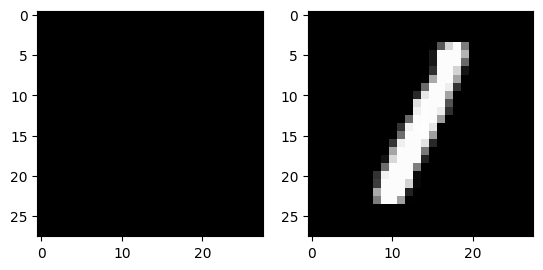

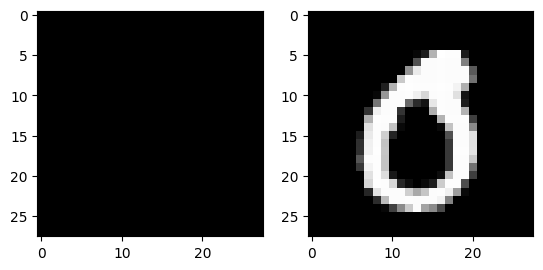

In [23]:
import matplotlib.pyplot as plt
imgs = [no1[100,:,:], no0[200,:,:]]
for i, img in enumerate(imgs):
    plt.subplot(1, 2, 1)
    plt.imshow(getHolePixels(img), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(img, cmap='gray')
    plt.show()


Now let us plot the number of hole pixels and see how this feature behaves

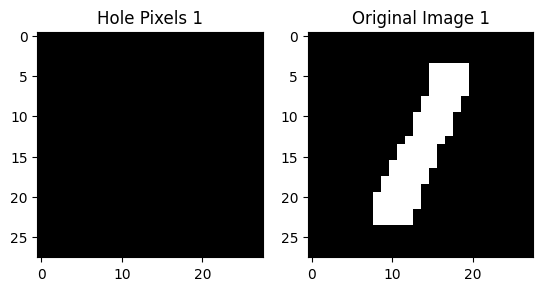

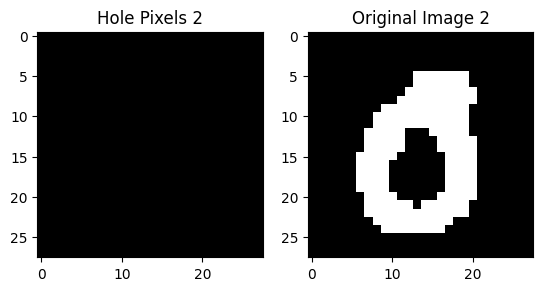

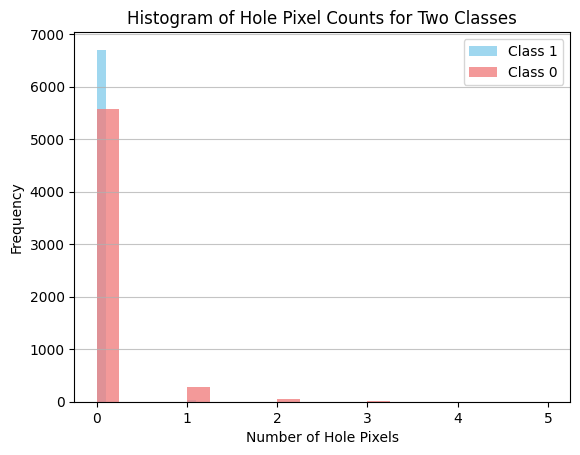

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define the getHolePixels function BEFORE it's called
def getHolePixels(img):
    """
    Calculates the number of "hole" pixels in a binary image.

    A hole pixel is a black pixel (value <= 0.5) surrounded by white pixels (value > 0.5).

    Args:
        img (np.ndarray): A 2D or 3D numpy array representing the image(s).
                          Shape can be (H, W) or (N, H, W).

    Returns:
        np.ndarray: A 2D or 3D numpy array of boolean values, where True indicates a hole pixel.
                    Shape is the same as the input img.
    """
    # Handle single image vs batch of images
    if img.ndim == 2:
        img = img[np.newaxis, :, :] # Add a batch dimension for consistent processing
        was_2d = True
    else:
        was_2d = False

    img_binary = img > 0.5 # Convert to boolean: True for white, False for black

    # Pad the image to handle boundary cases
    # Pad with False (black) pixels
    padded_img = np.pad(img_binary, ((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=False)

    # Check if a pixel's neighbors are True (white)
    # We check the neighbors of the pixel at position (i, j) in the original image,
    # which corresponds to position (i+1, j+1) in the padded image.
    # The neighbors in the padded image are at:
    # (i, j+1) -> padded_img[:-2, 1:-1] (Up)
    # (i+2, j+1) -> padded_img[2:, 1:-1] (Down)
    # (i+1, j) -> padded_img[1:-1, :-2] (Left)
    # (i+1, j+2) -> padded_img[1:-1, 2:] (Right)

    is_neighbor_white = (
        padded_img[:, :-2, 1:-1] &  # Up
        padded_img[:, 2:, 1:-1] &   # Down
        padded_img[:, 1:-1, :-2] & # Left
        padded_img[:, 1:-1, 2:]    # Right
    )

    # A hole pixel is originally black AND has all four neighbors white
    # ~img_binary has shape (N, H, W)
    # is_neighbor_white has shape (N, H, W)
    hole_pixels = (~img_binary) & is_neighbor_white

    if was_2d:
        return hole_pixels[0, :, :] # Remove the batch dimension if input was 2D
    else:
        return hole_pixels

# Calculate the number of hole pixels for each image in no1 and no0
# np.sum with axes (1, 2) correctly sums over the height and width dimensions for a (N, H, W) array
hole1 = np.sum(getHolePixels(no1), (1, 2))
hole0 = np.sum(getHolePixels(no0), (1, 2))

import matplotlib.pyplot as plt
# Visualize a few:
imgs = [no1[100,:,:], no0[200,:,:]]
for i, img in enumerate(imgs):
    plt.subplot(1, 2, 1)
    # getHolePixels now returns a boolean array, imshow works with booleans
    plt.imshow(getHolePixels(img), cmap='gray')
    plt.title(f'Hole Pixels {i+1}')
    plt.subplot(1, 2, 2)
    # Display the original image (converted to grayscale boolean for consistency in visualization)
    plt.imshow(img > 0.5, cmap='gray')
    plt.title(f'Original Image {i+1}')
    plt.show()

# Now let us plot the number of hole pixels and see how this feature behaves
plt.hist(hole1, bins=20, alpha=0.8, color='skyblue', label='Class 1');
plt.hist(hole0, bins=20, alpha=0.8, color='lightcoral', label='Class 0');
plt.title('Histogram of Hole Pixel Counts for Two Classes');
plt.xlabel('Number of Hole Pixels');
plt.ylabel('Frequency');
plt.legend();
plt.grid(axis='y', alpha=0.75);
plt.show();

This feature works even better to distinguish between one and zero.

Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [27]:
import numpy as np
def getHullPixels(img):
  im1 = np.cumsum(img, axis=0) # Cumulate along rows
  im2 = np.cumsum(img, axis=1) # Cumulate along columns
  im3 = np.cumsum(np.flip(img, axis=0), axis=0) # Cumulate flipped rows
  im4 = np.cumsum(np.flip(img, axis=1), axis=1) # Cumulate flipped columns
  hull = (im1 > 0) & (im2 > 0) & (np.flip(im3, axis=0) > 0) & (np.flip(im4, axis=1) > 0)
  return hull

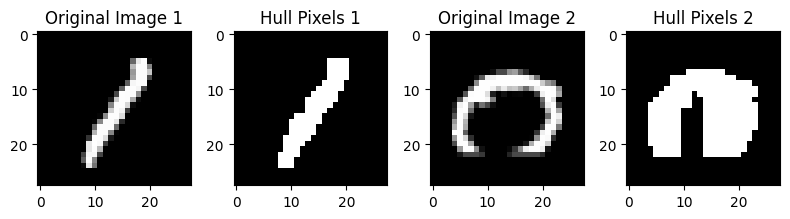

In [28]:
import matplotlib.pyplot as plt
# Visualize the hull pixels for some images with different parameters
imgs = [no1[456,:,:],  no0[456,:,:]]
plt.figure(figsize=(8, 4))  # Adjust figure size for better visualization
for i, img in enumerate(imgs):
  plt.subplot(1, 4, 1 + i * 2) # Subplots for original image
  plt.imshow(img, cmap='gray') # Display original image
  plt.title(f'Original Image {i+1}')
  plt.subplot(1, 4, 2 + i * 2) # Subplots for hull pixels
  plt.imshow(getHullPixels(img), cmap='gray') # Display hull pixels
  plt.title(f'Hull Pixels {i+1}')
plt.tight_layout()
plt.show()


Plotting the number of hull pixels versus the digit:

In [32]:
import numpy as np
# Assuming getHullPixels is defined in a previous cell and available
# If not, make sure the cell defining getHullPixels is executed

# Calculate the number of hull pixels for each image in no1 and no0
# np.sum with axes (1, 2) correctly sums over the height and width dimensions for a (N, H, W) array
# getHullPixels returns a boolean array, summing booleans counts the True values (which represent hull pixels)
hull1 = np.sum(getHullPixels(no1), (1, 2))
hull0 = np.sum(getHullPixels(no0), (1, 2))

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [30]:
import numpy as np
def getBoundaryPixels(img):
  img = img.copy()>0
  boundary = np.sum([np.roll(img, i, axis) for axis in [0, 1] for i in [-1, 1]], axis=0) < 4
  boundary = boundary * img
  return boundary


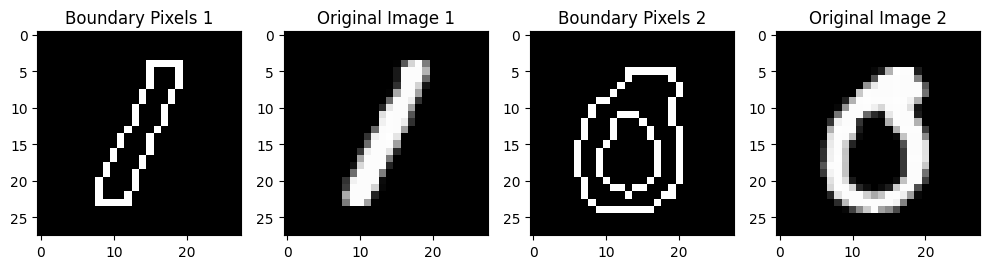

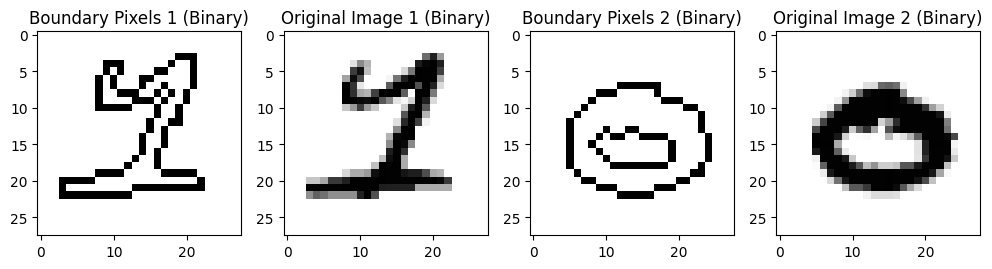

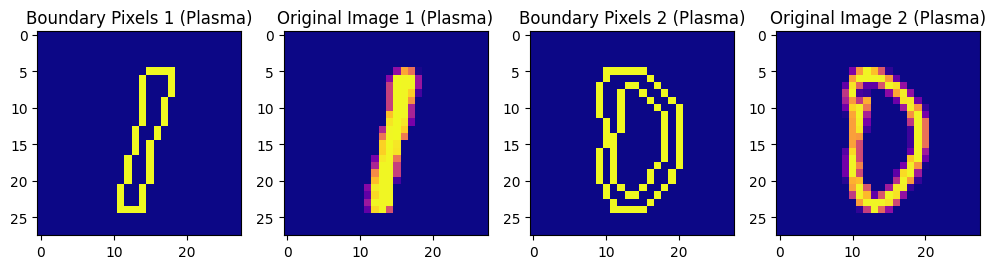

In [33]:
import matplotlib.pyplot as plt
imgs = [no1[100,:,:], no0[200,:,:]]
plt.figure(figsize=(10, 5)) # Adjust figure size as needed
for i, img in enumerate(imgs):
  plt.subplot(1, 4, 1 + i * 2)
  plt.imshow(getBoundaryPixels(img), cmap='gray')
  plt.title(f'Boundary Pixels {i+1}')
  plt.subplot(1, 4, 2 + i * 2)
  plt.imshow(img, cmap='gray')
  plt.title(f'Original Image {i+1}')
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

imgs = [no1[500,:,:],  no0[600,:,:]]
plt.figure(figsize=(10, 5))
for i, img in enumerate(imgs):
  plt.subplot(1, 4, 1 + i * 2)
  plt.imshow(getBoundaryPixels(img), cmap='binary') # Use different colormap
  plt.title(f'Boundary Pixels {i+1} (Binary)')
  plt.subplot(1, 4, 2 + i * 2)
  plt.imshow(img, cmap='binary') # Use different colormap
  plt.title(f'Original Image {i+1} (Binary)')
plt.tight_layout()
plt.show()

imgs = [no1[700,:,:],  no0[800,:,:]]
plt.figure(figsize=(10, 5))
for i, img in enumerate(imgs):
  plt.subplot(1, 4, 1 + i * 2)
  plt.imshow(getBoundaryPixels(img), cmap='plasma') # Use another colormap
  plt.title(f'Boundary Pixels {i+1} (Plasma)')
  plt.subplot(1, 4, 2 + i * 2)
  plt.imshow(img, cmap='plasma') # Use another colormap
  plt.title(f'Original Image {i+1} (Plasma)')
plt.tight_layout()
plt.show()


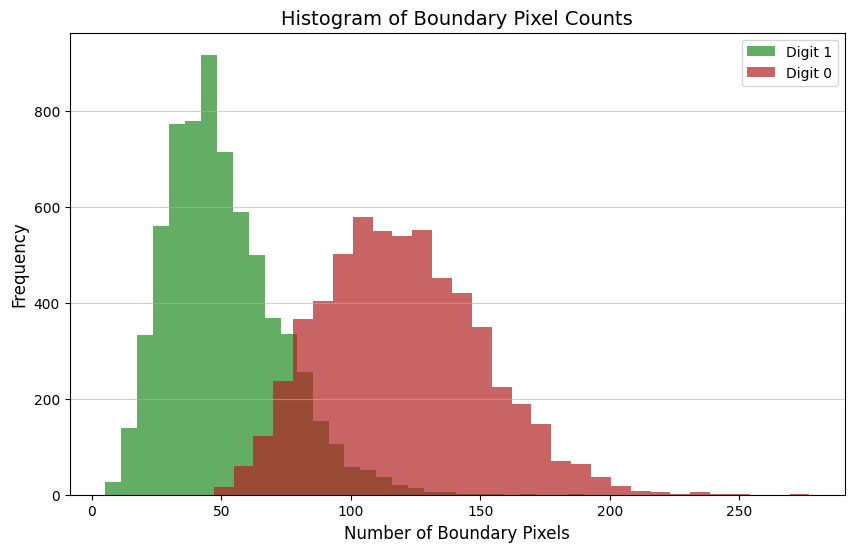

ValueError: operands could not be broadcast together with shapes (6742,28,28) (6742,28,30) 

In [35]:
import matplotlib.pyplot as plt
import numpy as np
hull1 = np.sum(getHullPixels(no1) > 0.5, (1, 2))
hull0 = np.sum(getHullPixels(no0) > 0.5, (1, 2))

boundary1 = np.sum(getBoundaryPixels(no1) > 0.5, (1, 2))
boundary0 = np.sum(getBoundaryPixels(no0) > 0.5, (1, 2))

plt.figure(figsize=(10, 6))
plt.hist(boundary1, bins=30, alpha=0.7, label='Digit 1', color='forestgreen')
plt.hist(boundary0, bins=30, alpha=0.7, label='Digit 0', color='firebrick')
plt.title('Histogram of Boundary Pixel Counts', fontsize=14)
plt.xlabel('Number of Boundary Pixels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.6)
plt.show()

def getHolePixels(img):
    """
    Calculates the number of "hole" pixels in a binary image.

    A hole pixel is a black pixel (value <= 0.5) surrounded by white pixels (value > 0.5).

    Args:
        img (np.ndarray): A 2D numpy array representing the image.

    Returns:
        np.ndarray: A 2D numpy array where 1 indicates a hole pixel and 0 otherwise.
    """
    img = img.copy() > 0.5 # Convert to boolean: True for white, False for black
    # Pad the image to handle boundary cases
    padded_img = np.pad(img, 1, mode='constant', constant_values=False)
    # Check if a pixel and its neighbors are True
    # For a pixel (i, j) in the original image, check the padded image at (i+1, j+1)
    # and its neighbors at (i, j+1), (i+2, j+1), (i+1, j), (i+1, j+2)
    is_neighbor_white = (
        padded_img[:-2, 1:-1] &  # Up
        padded_img[2:, 1:-1] &   # Down
        padded_img[1:-1, :-2] & # Left
        padded_img[1:-1, 2:]    # Right
    )
    # A hole pixel is originally black AND has all four neighbors white
    hole_pixels = (~img) & is_neighbor_white
    return hole_pixels

hole1 = np.sum(getHolePixels(no1), (1, 2))
hole0 = np.sum(getHolePixels(no0), (1, 2))

What will happen if we plot two features together?

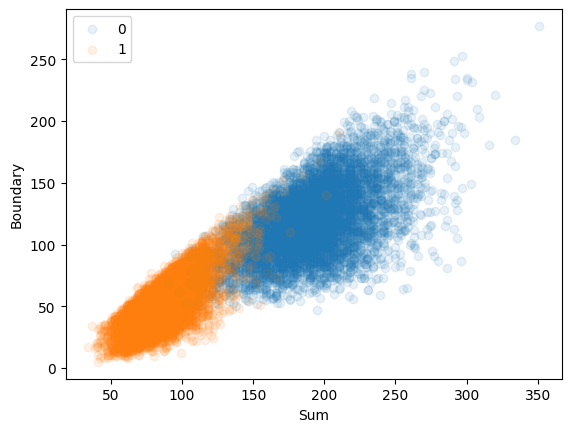

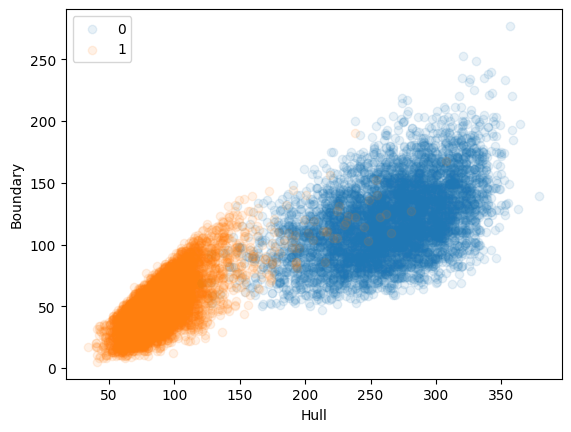

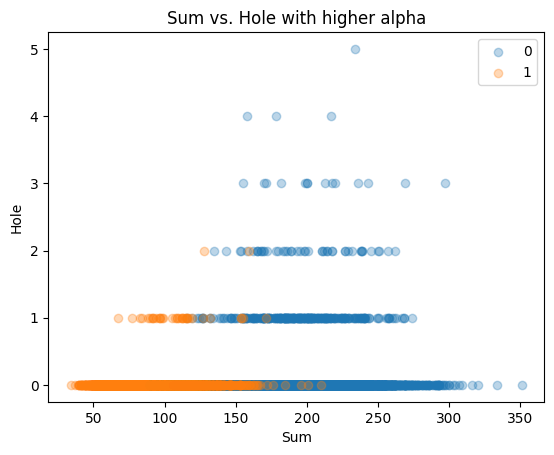

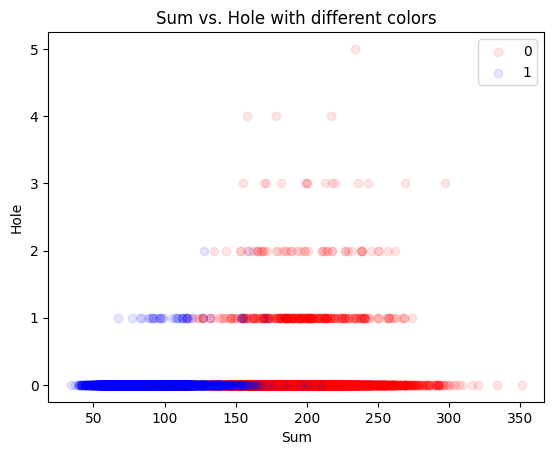

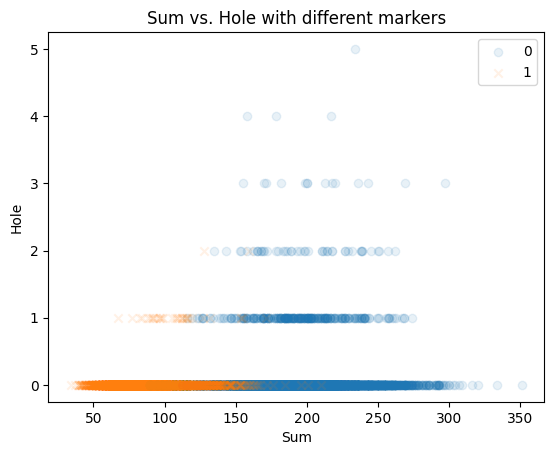

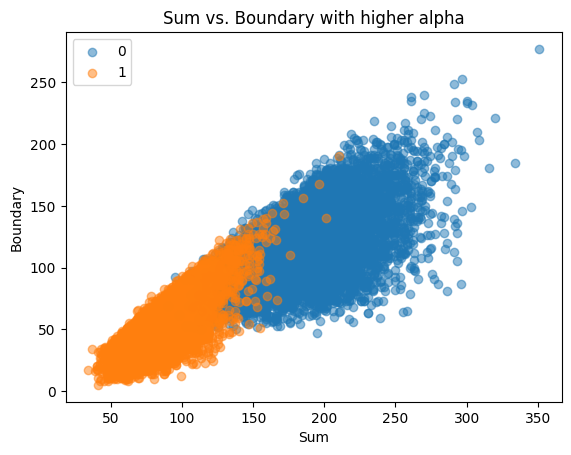

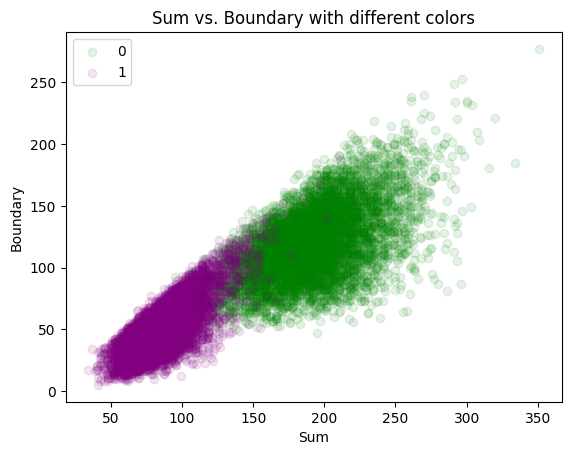

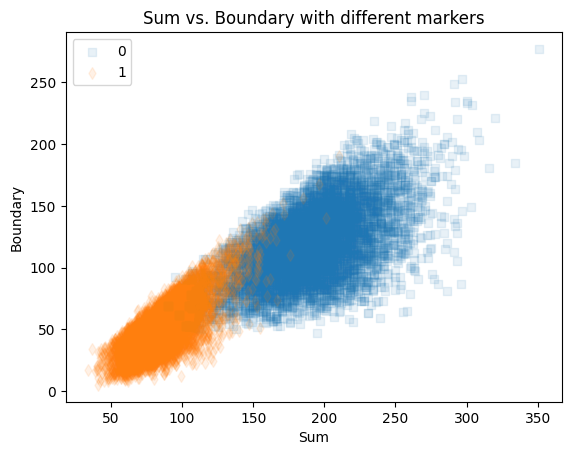

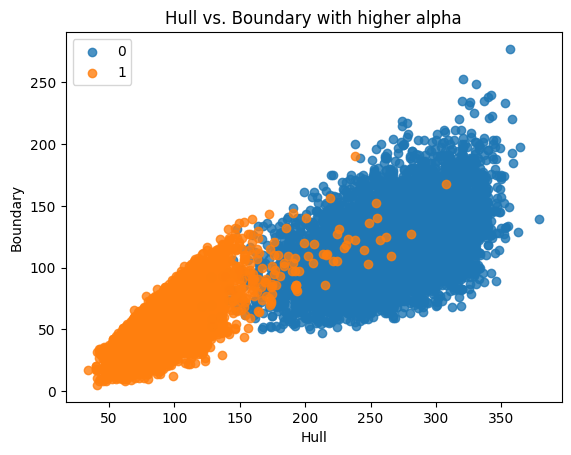

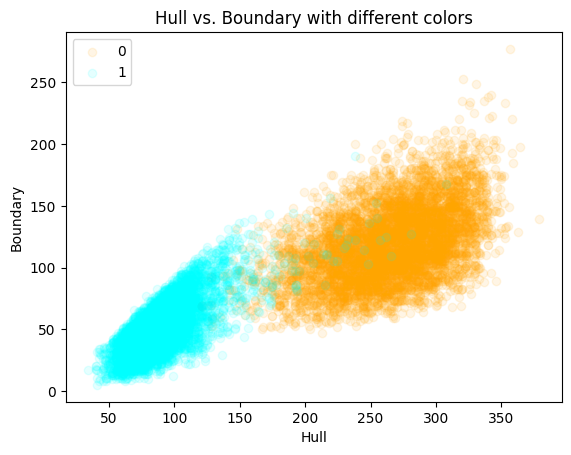

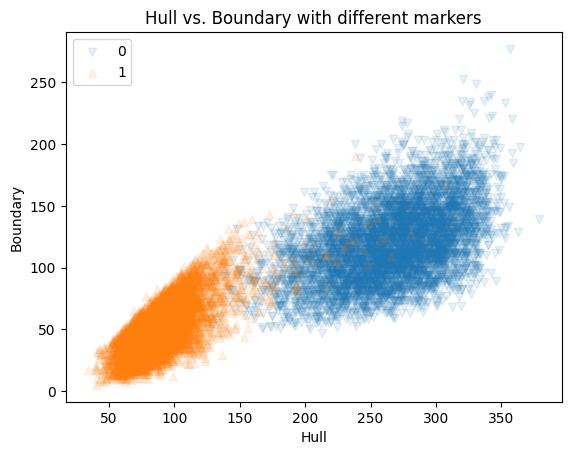

In [36]:
import matplotlib.pyplot as plt
# Boundary and sum
plt.scatter(sum0, boundary0, alpha=0.1)
plt.scatter(sum1, boundary1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Boundary')
plt.legend(['0','1'])
plt.show()
# Boundary and hull
plt.scatter(hull0, boundary0, alpha=0.1)
plt.scatter(hull1, boundary1, alpha=0.1)
plt.xlabel('Hull')
plt.ylabel('Boundary')
plt.legend(['0','1'])
plt.show()
# Sum and Hole with different alpha
plt.scatter(sum0, hole0, alpha=0.3, label='0')
plt.scatter(sum1, hole1, alpha=0.3, label='1')
plt.xlabel('Sum')
plt.ylabel('Hole')
plt.title('Sum vs. Hole with higher alpha')
plt.legend()
plt.show()
# Sum and Hole with different colors
plt.scatter(sum0, hole0, alpha=0.1, color='red', label='0')
plt.scatter(sum1, hole1, alpha=0.1, color='blue', label='1')
plt.xlabel('Sum')
plt.ylabel('Hole')
plt.title('Sum vs. Hole with different colors')
plt.legend()
plt.show()
# Sum and Hole with different marker styles
plt.scatter(sum0, hole0, alpha=0.1, marker='o', label='0')
plt.scatter(sum1, hole1, alpha=0.1, marker='x', label='1')
plt.xlabel('Sum')
plt.ylabel('Hole')
plt.title('Sum vs. Hole with different markers')
plt.legend()
plt.show()
# Boundary and sum with different alpha
plt.scatter(sum0, boundary0, alpha=0.5, label='0')
plt.scatter(sum1, boundary1, alpha=0.5, label='1')
plt.xlabel('Sum')
plt.ylabel('Boundary')
plt.title('Sum vs. Boundary with higher alpha')
plt.legend()
plt.show()
# Boundary and sum with different colors
plt.scatter(sum0, boundary0, alpha=0.1, color='green', label='0')
plt.scatter(sum1, boundary1, alpha=0.1, color='purple', label='1')
plt.xlabel('Sum')
plt.ylabel('Boundary')
plt.title('Sum vs. Boundary with different colors')
plt.legend()
plt.show()
# Boundary and sum with different marker styles
plt.scatter(sum0, boundary0, alpha=0.1, marker='s', label='0')
plt.scatter(sum1, boundary1, alpha=0.1, marker='d', label='1')
plt.xlabel('Sum')
plt.ylabel('Boundary')
plt.title('Sum vs. Boundary with different markers')
plt.legend()
plt.show()
# Boundary and hull with different alpha
plt.scatter(hull0, boundary0, alpha=0.8, label='0')
plt.scatter(hull1, boundary1, alpha=0.8, label='1')
plt.xlabel('Hull')
plt.ylabel('Boundary')
plt.title('Hull vs. Boundary with higher alpha')
plt.legend()
plt.show()
# Boundary and hull with different colors
plt.scatter(hull0, boundary0, alpha=0.1, color='orange', label='0')
plt.scatter(hull1, boundary1, alpha=0.1, color='cyan', label='1')
plt.xlabel('Hull')
plt.ylabel('Boundary')
plt.title('Hull vs. Boundary with different colors')
plt.legend()
plt.show()
# Boundary and hull with different marker styles
plt.scatter(hull0, boundary0, alpha=0.1, marker='v', label='0')
plt.scatter(hull1, boundary1, alpha=0.1, marker='^', label='1')
plt.xlabel('Hull')
plt.ylabel('Boundary')
plt.title('Hull vs. Boundary with different markers')
plt.legend()
plt.show()

Now let us try plotting 3 features together.

In [41]:
import pandas as pd
import plotly.express as px

# Combine the features and create a DataFrame
# Concatenate features for class 0 and class 1
hole_features = np.concatenate((hole0, hole1))
sum_features = np.concatenate((sum0, sum1))
boundary_features = np.concatenate((boundary0, boundary1))

# Create corresponding class labels
# Assuming hole0, sum0, boundary0 correspond to class 0
# and hole1, sum1, boundary1 correspond to class 1
class_labels = np.concatenate((np.zeros_like(hole0), np.ones_like(hole1)))

# Create the DataFrame
df = pd.DataFrame({
    'Hole': hole_features,
    'Sum': sum_features,
    'Boundary': boundary_features,
    'Class': class_labels
})

# Convert the 'Class' column to string for better categorical plotting
df['Class'] = df['Class'].astype(str)

# Now the rest of your plotting code using df should work

# Scatter plot with different marker symbols
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.5, symbol='Class')
fig.show()

# Scatter plot with different colors and sizes
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.3, size='Sum')
fig.show()

# Scatter plot with different colors and edge colors
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.2, color_discrete_map={'0': 'red', '1': 'blue'})
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.show()

# Scatter plot with a different camera angle
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.update_layout(scene = dict(camera = dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1.25, y=1.25, z=1.25))))
fig.show()

# Scatter plot with a different template
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1, template="plotly_dark")
fig.show()

# Scatter plot with custom hover information
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1, hover_data=['Hole', 'Sum', 'Boundary', 'Class'])
fig.show()

# Scatter plot with custom title and axis labels
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1,
                    title='3D Scatter Plot of Features by Class',
                    labels={'Hole': 'Number of Hole Pixels', 'Sum': 'Sum of Pixels', 'Boundary': 'Number of Boundary Pixels'})
fig.show()

In [ ]:
# This cell contains code snippets that seem to be left over
# from the getHolePixels function and cause a NameError.
# Removing this cell as it is not intended to be executed here.

In [50]:
# This cell contains code snippets that seem to be left over
# from the getHolePixels function and cause a NameError.
# Removing this cell as it is not intended to be executed here.
# is_neighbor_white = (
#         padded_img[:-2, 1:-1] &  # Up
#         padded_img[2:, 1:-1] &   # Down
#         padded_img[1:-1, :-2] & # Left
#         padded_img[1:-1, 2:]    # Right    )